<a href="https://colab.research.google.com/github/sedanurozer/Dictonary/blob/master/CNNC%C4%B0FAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   


In [2]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train=x_train/255.0
x_train.shape 

(50000, 32, 32, 3)

In [4]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

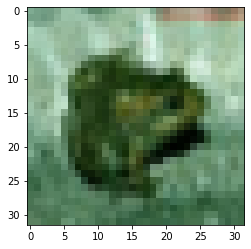

In [7]:
img_array=plt.imshow(x_test[93])

In [62]:
cifar10_model=tf.keras.models.Sequential()
cifar10_model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=5,padding="same", activation="relu", input_shape=[32,32,3]))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Flatten())
cifar10_model.add(tf.keras.layers.Dropout(0.25,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
cifar10_model.add(tf.keras.layers.Dropout(0.25,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
cifar10_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [63]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
history= cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7904 - sparse_categorical_accuracy: 0.3370
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1948 - sparse_categorical_accuracy: 0.5741
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9997 - sparse_categorical_accuracy: 0.6464
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9029 - sparse_categorical_accuracy: 0.6864
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8172 - sparse_categorical_accuracy: 0.7122
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7734 - sparse_categorical_accuracy: 0.7284
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7093 - sparse_categorical_accuracy: 0.7527
Epoch 8/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6756 - sparse_categorical_accuracy: 0.7626
Epoch 9/15
1563/1563 [==========

In [64]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.7963 - sparse_categorical_accuracy: 0.7465


In [65]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy'])


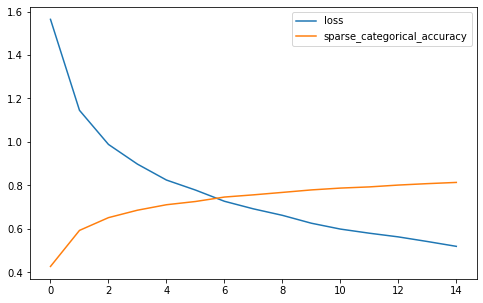

In [66]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()


In [67]:
print("Test accuracy: {}".format(test_accuracy*100))

Test accuracy: 74.6500015258789
